# EE5179 - Programming Assignment 1
Vishal Rishi MK - CH18B013

In [3]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### Download the dataset

In [ ]:
mnist_data_train = torchvision.datasets.MNIST(root = 'MNIST', download = True, transform = transforms.ToTensor())
mnist_data_test = torchvision.datasets.MNIST(root = 'MNIST', train = False, download = True, transform = transforms.ToTensor())

In [7]:
# Parameters

BATCH_SIZE = 64
CLASSES = 10
N_FEATURES = 784

In [16]:
train_loader = DataLoader(dataset = mnist_data_train, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(dataset = mnist_data_test, batch_size = len(mnist_data_test), shuffle = False)

## Helper functions
### Glorot Initialization

In [8]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
    """                
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        M = np.sqrt(6 / (layer_dims[l] + layer_dims[l - 1])) 
        parameters['W' + str(l)] = np.random.uniform(-M, M, (layer_dims[l], layer_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        # parameters['W' + str(l)] = parameters['W' + str(l)].astype('float128')
        # parameters['b' + str(l)] = parameters['b' + str(l)].astype('float128')

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

### Forward Propagation

In [9]:
def relu(x):
    return np.maximum(0,x)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def tanh(x):
  return (2 / (1 + np.exp(-2*x))) - 1

def softmax(x):
  exp = np.exp(x)
  return exp / np.sum(exp, axis = 0, keepdims = True)

def forward_propagation(X, parameters, activation = 'sigmoid'):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters 
    
    Returns:
    loss -- the loss function (categorical crossentropy loss)
    """
        
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    if activation == 'sigmoid':
      A1 = sigmoid(Z1)
    elif activation == 'relu':
      A1 = relu(Z1)
    else:
      A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    if activation == 'sigmoid':
      A2 = sigmoid(Z2)
    elif activation == 'relu':
      A2 = relu(Z2)
    else:
      A2 = tanh(Z2)
    Z3 = np.dot(W3, A2) + b3
    if activation == 'sigmoid':
      A3 = sigmoid(Z3)
    elif activation == 'relu':
      A3 = relu(Z3)
    else:
      A3 = tanh(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = softmax(Z4)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3, Z4, A4, W4, b4)
    
    return A4, cache


### Cross entropy loss function

In [10]:
def compute_cost(A4, Y):
    """
    Implement the cost function.
    
    Arguments:
    A4 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the loss function 
    """
    m = Y.shape[1]
    eps = 1e-5
    cross_entropy_cost = (-1./ m) * np.sum(Y * np.log(A4)) # -1./ m * np.log(np.sum(A4 * Y, axis = 0) + eps).sum() # This gives you the cross-entropy part of the cost
  
    return cross_entropy_cost

### Backpropagation

In [11]:
def backward_propagation(X, Y, cache, activation = 'sigmoid'):
    """
    Implements the backward propagation of our baseline model.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3, Z4, A4, W4, b4) = cache
    
    dZ4 = A4 - Y
    
    ### START CODE HERE ### (approx. 1 line)
    dW4 = 1./m * (np.dot(dZ4, A3.T))
    ### END CODE HERE ###
    db4 = 1./m * np.sum(dZ4, axis=1, keepdims = True)
    
    dA3 = np.dot(W4.T, dZ4)
    if activation ==  'sigmoid':
      dZ3 = np.multiply(dA3, A3 * (1 - A3))
    elif activation == 'relu':
      dZ3 = np.multiply(dA3, np.int64(A3 > 0))
    else:
      dZ3 = np.multiply(dA3, 1 - A3 ** 2)
    ### START CODE HERE ### (approx. 1 line)
    dW3 = 1./m * (np.dot(dZ3, A2.T))
    ### END CODE HERE ###
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    if activation ==  'sigmoid':
      dZ2 = np.multiply(dA2, A2 * (1 - A2))
    elif activation == 'relu':
      dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    else:
      dZ2 = np.multiply(dA2, 1 - A2 ** 2)
    ### START CODE HERE ### (approx. 1 line)
    dW2 = 1./m * (np.dot(dZ2, A1.T))
    ### END CODE HERE ###
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    if activation ==  'sigmoid':
      dZ1 = np.multiply(dA1, A1 * (1 - A1))
    elif activation == 'relu':
      dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    else:
      dZ1 = np.multiply(dA1, 1 - A1 ** 2)
    ### START CODE HERE ### (approx. 1 line)
    dW1 = 1./m * (np.dot(dZ1, X.T))
    ### END CODE HERE ###
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ4": dZ4, "dW4": dW4, "db4": db4, "dA3": dA3,
                 "dZ3": dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

### Gradient descent

In [12]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(i)] = Wi
                    parameters['b' + str(i)] = bi
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(i)] = dWi
                    grads['db' + str(i)] = dbi
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    n = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(n):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

### Neural Network - Architecture

In [13]:
def model(train_loader, test_loader, activation = 'sigmoid', learning_rate = 0.1, num_epochs = 15, print_cost = True):
    """
    Implements a four-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    train_loader - Dataloader
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    train_costs = []
    test_costs = []                            # to keep track of the cost                        
    layers_dims = [784, 500, 250, 100, 10]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(num_epochs):
      for j, (images, labels) in enumerate(train_loader):
        images = images.view(784, -1).numpy() #.astype('float128')
        labels = nn.functional.one_hot(labels, num_classes = 10).T.numpy() #.astype('float128')
        a4, cache = forward_propagation(images, parameters, activation = activation)
        
        # Cost function
        train_cost = compute_cost(a4, labels)
            
        # Backward propagation.    

        grads = backward_propagation(images, labels, cache, activation = activation)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 200 iterations
        if print_cost and j % 200 == 0:
            _, _, test_cost = predict(test_loader, parameters, activation = activation)
            print('Epoch {}: '.format(i) + "Train Cost after iteration {}: {}".format(j, train_cost))
            print('Epoch {}: '.format(i) + "Test Cost after iteration {}: {}".format(j, test_cost))
        if j % 200 == 0:
          train_costs.append(train_cost)
          test_costs.append(test_cost)
    
    # plot the cost
    plt.plot(train_costs)
    plt.plot(test_costs)
    plt.ylabel('Cost')
    plt.xlabel('iterations')
    plt.title("Learning curves (Learning rate = " + str(learning_rate) + ')')
    plt.legend(['Train loss', 'Test loss'])
    plt.show()
    
    return parameters

### Prediction using a neural network

In [14]:
def predict(test_loader, parameters, activation = 'sigmoid', print_res = False):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    X, y = iter(test_loader).next()
    X = X.view(784, -1).numpy() # .astype('float128')
    m = X.shape[1]
    p = np.zeros((m, 1), dtype = np.int64)
    
    # Forward propagation
    a4, caches = forward_propagation(X, parameters, activation = activation)
    cost = compute_cost(a4, nn.functional.one_hot(y, num_classes = 10).T.numpy())
    if print_res:
      print("Cost function value: " + str(cost))
    
    # convert probabilities to predictions
    for i in range(m):
      p[i] = np.argmax(a4[:, i])
    if print_res:
      print("Accuracy: "  + str(accuracy_score(y.numpy(), p)))

      print("Classification Report: \n")
      print(classification_report(y.numpy(), p, zero_division = 0))

      print("Confusion Matrix: \n")
      cm = confusion_matrix(y.numpy(), p, labels = range(10))
      disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = range(10))
      disp.plot()
      plt.show()
    
    return p, a4, cost

### Training the network using sigmoid activation in hidden layers

Epoch 0: Train Cost after iteration 0: 2.5719125133935545
Epoch 0: Test Cost after iteration 0: 2.42216824334963
Epoch 0: Train Cost after iteration 200: 2.291989544900653
Epoch 0: Test Cost after iteration 200: 2.301585437301912
Epoch 0: Train Cost after iteration 400: 2.2940887041865814
Epoch 0: Test Cost after iteration 400: 2.3014524122684334
Epoch 0: Train Cost after iteration 600: 2.3023473155335656
Epoch 0: Test Cost after iteration 600: 2.3022526161776278
Epoch 0: Train Cost after iteration 800: 2.296505307950585
Epoch 0: Test Cost after iteration 800: 2.3025548348278
Epoch 1: Train Cost after iteration 0: 2.3057665478551224
Epoch 1: Test Cost after iteration 0: 2.3027273069805436
Epoch 1: Train Cost after iteration 200: 2.2885350130961273
Epoch 1: Test Cost after iteration 200: 2.3026865403925076
Epoch 1: Train Cost after iteration 400: 2.3236197525184137
Epoch 1: Test Cost after iteration 400: 2.301204999914516
Epoch 1: Train Cost after iteration 600: 2.296899200877439
Epoch 

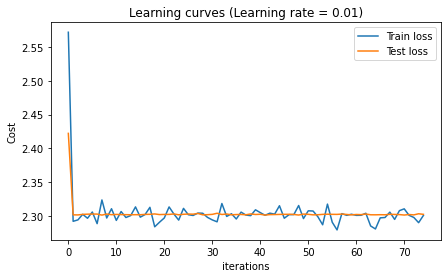

In [13]:
parameters = model(train_loader, test_loader, activation = 'sigmoid', learning_rate = 0.01, num_epochs = 15)

### Results on Train data

Cost function value: 2.303129034713299
Accuracy: 0.10856666666666667
Classification Report: 

              precision    recall  f1-score   support

           0       0.09      0.00      0.01      5923
           1       0.11      0.43      0.18      6742
           2       0.00      0.00      0.00      5958
           3       0.00      0.00      0.00      6131
           4       0.00      0.00      0.00      5842
           5       0.00      0.00      0.00      5421
           6       0.00      0.00      0.00      5918
           7       0.10      0.58      0.18      6265
           8       0.00      0.00      0.00      5851
           9       0.00      0.00      0.00      5949

    accuracy                           0.11     60000
   macro avg       0.03      0.10      0.04     60000
weighted avg       0.03      0.11      0.04     60000

Confusion Matrix: 



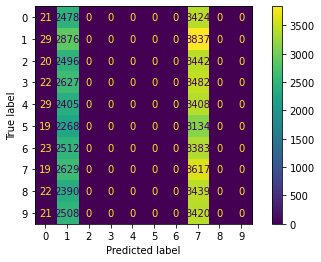

In [17]:
p, a4, cost = predict(DataLoader(dataset = mnist_data_train, batch_size = len(mnist_data_train), shuffle = False), parameters, print_res = True)

### Results on Test data

Cost function value: 2.3028428684195688
Accuracy: 0.1103
Classification Report: 

              precision    recall  f1-score   support

           0       0.05      0.00      0.00       980
           1       0.12      0.48      0.19      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.10      0.54      0.17      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.03      0.10      0.04     10000
weighted avg       0.03      0.11      0.04     10000

Confusion Matrix: 



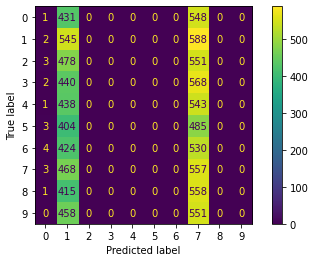

In [14]:
p, a4, cost = predict(test_loader, parameters, print_res = True)

### Observations:
1. From the learning curves, we can see that the training and test loss has not decreased. This can happen in a local minimum, where the gradients are very less and the update is negligible. Increasing the learning rate or decreasing the batch size might help
2. From the confusion matrices, we can see that the output of the network is either class 1 or class 7. This shows that the model has not learnt to differentiate between the classes
3. Another explanation for this could be due to initialization. If the initial parameters are close to a local sub-optimal minimum, gradient descent is more likely to get there 

## Section 1.1

### Training the network using Tanh activation in hidden layers

Epoch 0: Train Cost after iteration 0: 2.370426857762624
Epoch 0: Test Cost after iteration 0: 2.3961447139418763
Epoch 0: Train Cost after iteration 200: 2.2869323995603716
Epoch 0: Test Cost after iteration 200: 2.371178464720345
Epoch 0: Train Cost after iteration 400: 2.306799237193329
Epoch 0: Test Cost after iteration 400: 2.3635490990263586
Epoch 0: Train Cost after iteration 600: 2.367433842577225
Epoch 0: Test Cost after iteration 600: 2.3516454624769576
Epoch 0: Train Cost after iteration 800: 2.341001244035918
Epoch 0: Test Cost after iteration 800: 2.346398245987303
Epoch 1: Train Cost after iteration 0: 2.3703808355567446
Epoch 1: Test Cost after iteration 0: 2.3427709631981477
Epoch 1: Train Cost after iteration 200: 2.3235919952462267
Epoch 1: Test Cost after iteration 200: 2.338717058640107
Epoch 1: Train Cost after iteration 400: 2.308204460711583
Epoch 1: Test Cost after iteration 400: 2.333637146072597
Epoch 1: Train Cost after iteration 600: 2.3344690799785752
Epoch

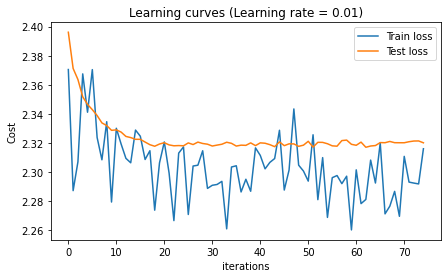

In [18]:
parameters = model(train_loader, test_loader, activation = 'tanh', learning_rate = 0.01, num_epochs = 15)

### Results on Train data

Cost function value: 2.39583961239555
Accuracy: 0.09863333333333334
Classification Report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5923
           1       0.00      0.00      0.00      6742
           2       0.00      0.00      0.00      5958
           3       0.00      0.00      0.00      6131
           4       0.00      0.00      0.00      5842
           5       0.00      0.00      0.00      5421
           6       0.10      1.00      0.18      5918
           7       0.00      0.00      0.00      6265
           8       0.00      0.00      0.00      5851
           9       0.00      0.00      0.00      5949

    accuracy                           0.10     60000
   macro avg       0.01      0.10      0.02     60000
weighted avg       0.01      0.10      0.02     60000

Confusion Matrix: 



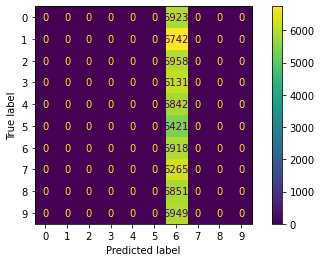

In [19]:
p, a4, cost = predict(DataLoader(dataset = mnist_data_train, batch_size = len(mnist_data_train), shuffle = False), parameters, print_res = True)

### Results on Test data

Cost function value: 2.3976575217779597
Accuracy: 0.0958
Classification Report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.10      1.00      0.17       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Confusion Matrix: 



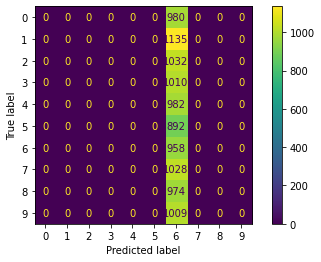

In [20]:
p, a4, cost = predict(test_loader, parameters, print_res = True)

### Observations:
1. From the learning curves, we can see that the training and test loss has not decreased. This can happen in a local minimum, where the gradients are very less and the update is negligible. Increasing the learning rate or decreasing the batch size might help
2. From the confusion matrices, we can see that the output of the network is either class 6. This shows that the model has not learnt to differentiate between the classes 
3. Another explanation for this could be due to initialization. If the initial parameters are close to a local sub-optimal minimum, gradient descent is more likely to get there 

### Training the network using ReLu activation in hidden layers

Epoch 0: Train Cost after iteration 0: 2.3827294328084827
Epoch 0: Test Cost after iteration 0: 2.326117752169449
Epoch 0: Train Cost after iteration 200: 2.2785562898438068
Epoch 0: Test Cost after iteration 200: 2.3087968050144965
Epoch 0: Train Cost after iteration 400: 2.316216861498373
Epoch 0: Test Cost after iteration 400: 2.307127944786458
Epoch 0: Train Cost after iteration 600: 2.359062636807434
Epoch 0: Test Cost after iteration 600: 2.3062930234110994
Epoch 0: Train Cost after iteration 800: 2.3145487130037385
Epoch 0: Test Cost after iteration 800: 2.305237654759891
Epoch 1: Train Cost after iteration 0: 2.314405150406511
Epoch 1: Test Cost after iteration 0: 2.3047967235069717
Epoch 1: Train Cost after iteration 200: 2.291038589357926
Epoch 1: Test Cost after iteration 200: 2.3049275696195908
Epoch 1: Train Cost after iteration 400: 2.31418091689215
Epoch 1: Test Cost after iteration 400: 2.3046950702297537
Epoch 1: Train Cost after iteration 600: 2.297367558828915
Epoch 

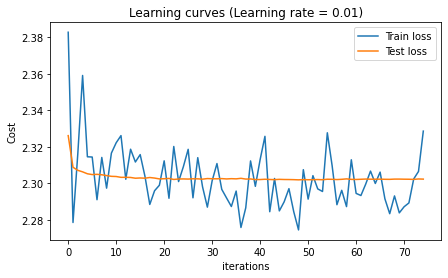

In [21]:
parameters = model(train_loader, test_loader, activation = 'relu', learning_rate = 0.01, num_epochs = 15)

### Results on Train data

Cost function value: 2.4004306265709707
Accuracy: 0.11236666666666667
Classification Report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5923
           1       0.11      1.00      0.20      6742
           2       0.00      0.00      0.00      5958
           3       0.00      0.00      0.00      6131
           4       0.00      0.00      0.00      5842
           5       0.00      0.00      0.00      5421
           6       0.00      0.00      0.00      5918
           7       0.00      0.00      0.00      6265
           8       0.00      0.00      0.00      5851
           9       0.00      0.00      0.00      5949

    accuracy                           0.11     60000
   macro avg       0.01      0.10      0.02     60000
weighted avg       0.01      0.11      0.02     60000

Confusion Matrix: 



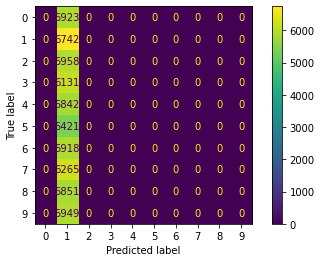

In [22]:
p, a4, cost = predict(DataLoader(dataset = mnist_data_train, batch_size = len(mnist_data_train), shuffle = False), parameters, print_res = True)

### Results on Test data

Cost function value: 2.402205988054233
Accuracy: 0.1135
Classification Report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000

Confusion Matrix: 



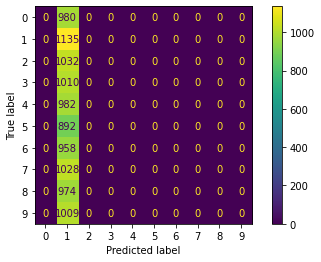

In [23]:
p, a4, cost = predict(test_loader, parameters, print_res = True)

### Observations:
1. From the learning curves, we can see that the training and test loss has not decreased. This can happen in a local minimum, where the gradients are very less and the update is negligible. Increasing the learning rate or decreasing the batch size might help
2. From the confusion matrices, we can see that the output of the network is either class 1. This shows that the model has not learnt to differentiate between the classes
3. Another explanation for this could be due to initialization. If the initial parameters are close to a local sub-optimal minimum, gradient descent is more likely to get there  

## Section 2

### Neural Network - Architecture (PyTorch)
We replicate the architecture with ReLu activation used in the previous section in PyTorch. 

In [31]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim1) 
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)  
    
    def forward(self, x):
        # Linear function
        z1 = self.fc1(x)
        # Non-linearity
        a1 = self.relu(z1)
        z2 = self.fc2(a1)
        a2 = self.relu(z2)
        z3 = self.fc3(a2)
        a3 = self.relu(z3)
        # Linear function (readout)
        out = self.fc4(a3)
        return out

### Training the network using ReLu activation in hidden layers - PyTorch

Iteration: 200. Train Loss: 0.34125789999961853. Test Accuracy: 92.66000366210938
Iteration: 400. Train Loss: 0.028034241870045662. Test Accuracy: 94.08000183105469
Iteration: 600. Train Loss: 0.18446379899978638. Test Accuracy: 93.68000030517578
Iteration: 800. Train Loss: 0.12346944957971573. Test Accuracy: 94.94000244140625
Iteration: 1000. Train Loss: 0.06372620910406113. Test Accuracy: 95.73999786376953
Iteration: 1200. Train Loss: 0.14720498025417328. Test Accuracy: 95.13999938964844
Iteration: 1400. Train Loss: 0.15510722994804382. Test Accuracy: 95.43000030517578
Iteration: 1600. Train Loss: 0.05684071406722069. Test Accuracy: 95.80999755859375
Iteration: 1800. Train Loss: 0.13419896364212036. Test Accuracy: 95.7300033569336
Iteration: 2000. Train Loss: 0.06884971261024475. Test Accuracy: 96.08999633789062
Iteration: 2200. Train Loss: 0.059058092534542084. Test Accuracy: 96.06999969482422
Iteration: 2400. Train Loss: 0.04260857775807381. Test Accuracy: 96.33000183105469
Iterati

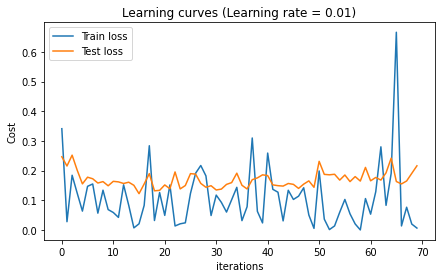

In [35]:
batch_size = 64
# n_iters = 3000
# num_epochs = n_iters / (len(mnist_data_train) / batch_size)
num_epochs = 15

'''
INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, 500, 250, 100, output_dim)

'''
INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

'''
TRAIN THE MODEL
'''
train_costs = []
test_costs = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 200 == 0:
            train_costs.append(loss.item())
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                test_cost = criterion(outputs, labels)
                test_costs.append(test_cost.item())
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Train Loss: {}. Test Accuracy: {}'.format(iter, loss.item(), accuracy))

# plot the cost
plt.plot(train_costs)
plt.plot(test_costs)
plt.ylabel('Cost')
plt.xlabel('iterations')
plt.title("Learning curves (Learning rate = " + str(learning_rate) + ')')
plt.legend(['Train loss', 'Test loss'])
plt.show()

### Results on Train data

Cost function value: 0.060430414974689484
Accuracy: 0.9870333333333333
Classification Report: 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5923
           1       1.00      0.99      0.99      6742
           2       0.99      0.99      0.99      5958
           3       0.99      0.98      0.99      6131
           4       0.95      1.00      0.97      5842
           5       0.99      0.99      0.99      5421
           6       0.99      1.00      0.99      5918
           7       0.99      0.99      0.99      6265
           8       0.98      0.98      0.98      5851
           9       0.99      0.96      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

Confusion Matrix: 



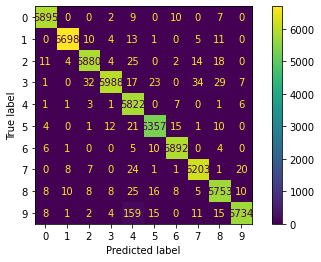

In [36]:
for images, labels in DataLoader(dataset = mnist_data_train, batch_size = len(mnist_data_train), shuffle = False):
  # Load images to a Torch Variable
  images = images.view(-1, 28*28)
                
  # Forward pass only to get logits/output
  outputs = model(images)
  test_cost = criterion(outputs, labels)
  print("Cost function value: " + str(test_cost.item()))

  # Get predictions from the maximum value
  _, predicted = torch.max(outputs.data, 1)

  print("Accuracy: "  + str(accuracy_score(labels.numpy(), predicted.numpy())))

  print("Classification Report: \n")
  print(classification_report(labels.numpy(), predicted.numpy(), zero_division = 0))

  print("Confusion Matrix: \n")
  cm = confusion_matrix(labels.numpy(), predicted.numpy(), labels = range(10))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = range(10))
  disp.plot()
  plt.show()

### Results on Test data

Cost function value: 0.21429859101772308
Accuracy: 0.9702
Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.92      0.98      0.95       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.98      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix: 



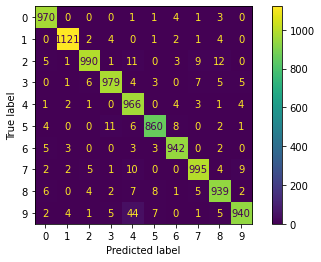

In [37]:
for images, labels in test_loader:
  # Load images to a Torch Variable
  images = images.view(-1, 28*28)
                
  # Forward pass only to get logits/output
  outputs = model(images)
  test_cost = criterion(outputs, labels)
  print("Cost function value: " + str(test_cost.item()))

  # Get predictions from the maximum value
  _, predicted = torch.max(outputs.data, 1)

  print("Accuracy: "  + str(accuracy_score(labels.numpy(), predicted.numpy())))

  print("Classification Report: \n")
  print(classification_report(labels.numpy(), predicted.numpy(), zero_division = 0))

  print("Confusion Matrix: \n")
  cm = confusion_matrix(labels.numpy(), predicted.numpy(), labels = range(10))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = range(10))
  disp.plot()
  plt.show()

### Observations:
1. From the learning curves, we can see that the training and test loss has  decreased but not steadily
2. From the confusion matrices and the classification report, the training accuracy and the test accuracy are comparable. This shows that there is negligible overfitting 
3. The same architecture in the previous section struggled to learn. One explanation for this could be due to initialization. If the initial parameters are close to a local sub-optimal minimum, gradient descent is more likely to get there than Adam optimizer. 

## Section 2.1 - Regularization

### Training the network using ReLu activation in hidden layers with L2 regularization - PyTorch

Iteration: 200. Train Loss: 0.10617508739233017. Test Accuracy: 91.05999755859375
Iteration: 400. Train Loss: 0.3544728755950928. Test Accuracy: 90.80000305175781
Iteration: 600. Train Loss: 0.1509900838136673. Test Accuracy: 94.08000183105469
Iteration: 800. Train Loss: 0.15830056369304657. Test Accuracy: 92.16999816894531
Iteration: 1000. Train Loss: 0.14785288274288177. Test Accuracy: 93.0999984741211
Iteration: 1200. Train Loss: 0.1623939424753189. Test Accuracy: 94.33999633789062
Iteration: 1400. Train Loss: 0.15877869725227356. Test Accuracy: 93.66999816894531
Iteration: 1600. Train Loss: 0.25168490409851074. Test Accuracy: 93.33999633789062
Iteration: 1800. Train Loss: 0.2549205422401428. Test Accuracy: 93.91999816894531
Iteration: 2000. Train Loss: 0.1488838642835617. Test Accuracy: 94.05999755859375
Iteration: 2200. Train Loss: 0.29671281576156616. Test Accuracy: 93.91999816894531
Iteration: 2400. Train Loss: 0.22450260818004608. Test Accuracy: 93.58000183105469
Iteration: 260

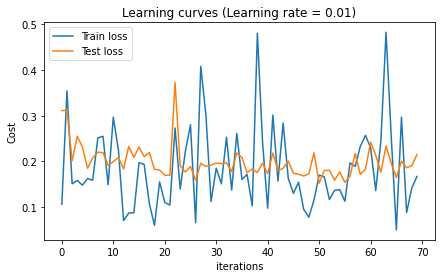

In [41]:
batch_size = 64
# n_iters = 3000
# num_epochs = n_iters / (len(mnist_data_train) / batch_size)
num_epochs = 15
alpha = 0.001

'''
INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, 500, 250, 100, output_dim)

'''
INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = alpha)

'''
TRAIN THE MODEL
'''
train_costs = []
test_costs = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 200 == 0:
            train_costs.append(loss.item())
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                test_cost = criterion(outputs, labels)
                test_costs.append(test_cost.item())
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Train Loss: {}. Test Accuracy: {}'.format(iter, loss.item(), accuracy))

# plot the cost
plt.plot(train_costs)
plt.plot(test_costs)
plt.ylabel('Cost')
plt.xlabel('iterations')
plt.title("Learning curves (Learning rate = " + str(learning_rate) + ')')
plt.legend(['Train loss', 'Test loss'])
plt.show()

### Results on Train data

Cost function value: 0.21394699811935425
Accuracy: 0.9347666666666666
Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5923
           1       0.95      0.99      0.97      6742
           2       0.97      0.87      0.92      5958
           3       0.87      0.92      0.90      6131
           4       0.96      0.95      0.95      5842
           5       0.84      0.96      0.90      5421
           6       0.97      0.93      0.95      5918
           7       0.96      0.93      0.95      6265
           8       0.90      0.92      0.91      5851
           9       0.95      0.90      0.93      5949

    accuracy                           0.93     60000
   macro avg       0.94      0.93      0.93     60000
weighted avg       0.94      0.93      0.94     60000

Confusion Matrix: 



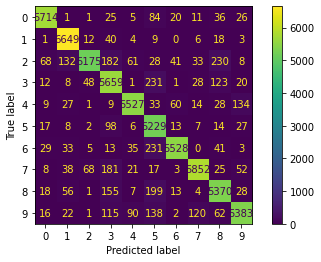

In [42]:
for images, labels in DataLoader(dataset = mnist_data_train, batch_size = len(mnist_data_train), shuffle = False):
  # Load images to a Torch Variable
  images = images.view(-1, 28*28)
                
  # Forward pass only to get logits/output
  outputs = model(images)
  test_cost = criterion(outputs, labels)
  print("Cost function value: " + str(test_cost.item()))

  # Get predictions from the maximum value
  _, predicted = torch.max(outputs.data, 1)

  print("Accuracy: "  + str(accuracy_score(labels.numpy(), predicted.numpy())))

  print("Classification Report: \n")
  print(classification_report(labels.numpy(), predicted.numpy(), zero_division = 0))

  print("Confusion Matrix: \n")
  cm = confusion_matrix(labels.numpy(), predicted.numpy(), labels = range(10))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = range(10))
  disp.plot()
  plt.show()

### Results on Test data

Cost function value: 0.21937766671180725
Accuracy: 0.934
Classification Report: 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.96      0.99      0.98      1135
           2       0.97      0.87      0.92      1032
           3       0.87      0.93      0.90      1010
           4       0.95      0.95      0.95       982
           5       0.83      0.96      0.89       892
           6       0.97      0.92      0.94       958
           7       0.96      0.93      0.94      1028
           8       0.90      0.92      0.91       974
           9       0.96      0.90      0.93      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000

Confusion Matrix: 



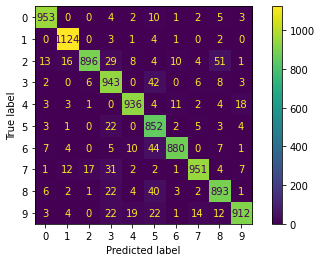

In [43]:
for images, labels in test_loader:
  # Load images to a Torch Variable
  images = images.view(-1, 28*28)
                
  # Forward pass only to get logits/output
  outputs = model(images)
  test_cost = criterion(outputs, labels)
  print("Cost function value: " + str(test_cost.item()))

  # Get predictions from the maximum value
  _, predicted = torch.max(outputs.data, 1)

  print("Accuracy: "  + str(accuracy_score(labels.numpy(), predicted.numpy())))

  print("Classification Report: \n")
  print(classification_report(labels.numpy(), predicted.numpy(), zero_division = 0))

  print("Confusion Matrix: \n")
  cm = confusion_matrix(labels.numpy(), predicted.numpy(), labels = range(10))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = range(10))
  disp.plot()
  plt.show()

### Observations:
1. The effect of regularization can be seen when we compare the train and test accuracies. They are approximately 93%. Thus, regularization constrains the network from overperforming in the train set (leading to decrease in training accuracy when compared with unregularized network) and achieves generalization in unseen data 
2. Comparing the classification results with the unregularized network in the previous section, the unregularized network performs better. This is because of its higher classification accuracy on the test set with negligible overfitting

## Experiments

### Decreasing the batch size

In [24]:
BATCH_SIZE = 2

In [25]:
train_loader = DataLoader(dataset = mnist_data_train, batch_size = BATCH_SIZE, shuffle = True)

Epoch 0: Train Cost after iteration 0: 2.0622216098638178
Epoch 0: Test Cost after iteration 0: 2.327681685537653
Epoch 0: Train Cost after iteration 200: 1.5722530256361118
Epoch 0: Test Cost after iteration 200: 2.332771148428241
Epoch 0: Train Cost after iteration 400: 1.9228160165679895
Epoch 0: Test Cost after iteration 400: 2.36748180206801
Epoch 0: Train Cost after iteration 600: 2.0890071237292775
Epoch 0: Test Cost after iteration 600: 2.41736310270802
Epoch 0: Train Cost after iteration 800: 1.7857948268535142
Epoch 0: Test Cost after iteration 800: 2.471375089232019
Epoch 0: Train Cost after iteration 1000: 1.5393902771616328
Epoch 0: Test Cost after iteration 1000: 2.482208925616837
Epoch 0: Train Cost after iteration 1200: 1.067857311615964
Epoch 0: Test Cost after iteration 1200: 2.4776225745856966
Epoch 0: Train Cost after iteration 1400: 2.3908523755459257
Epoch 0: Test Cost after iteration 1400: 2.562006349398782
Epoch 0: Train Cost after iteration 1600: 0.962107645723

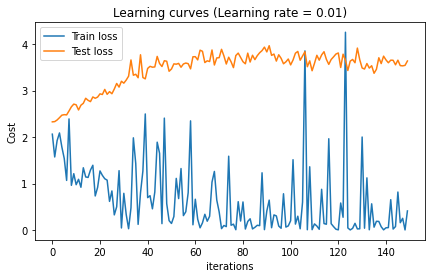

In [26]:
parameters = model(train_loader, test_loader, activation = 'relu', learning_rate = 0.01, num_epochs = 1)

### Observations:
1. As mentioned earlier, when the batch size is reduced to 2, the training loss is decreasing steadily. This shows that during initialization, there was possibly a local minimum, which caused the vanishing gradients problem. By reducing the batch size, we are increasing the variance of the gradient estimate. This helps to come out of the local minimum
2. Though the training loss is decreasing, the test loss has not. This is a sign of overfitting. We might need to regularize the network for better results

### Weight decay hyperparameter

### Alpha is set to 0.5

In [28]:
BATCH_SIZE = 64

In [29]:
train_loader = DataLoader(dataset = mnist_data_train, batch_size = BATCH_SIZE, shuffle = True)

Iteration: 200. Train Loss: 2.305535316467285. Test Accuracy: 10.09000015258789
Iteration: 400. Train Loss: 2.3055994510650635. Test Accuracy: 10.100000381469727
Iteration: 600. Train Loss: 2.298222541809082. Test Accuracy: 11.350000381469727
Iteration: 800. Train Loss: 2.3028271198272705. Test Accuracy: 9.579999923706055
Iteration: 1000. Train Loss: 2.30277943611145. Test Accuracy: 10.319999694824219
Iteration: 1200. Train Loss: 2.303581714630127. Test Accuracy: 10.09000015258789
Iteration: 1400. Train Loss: 2.302807331085205. Test Accuracy: 10.319999694824219
Iteration: 1600. Train Loss: 2.303342819213867. Test Accuracy: 10.100000381469727
Iteration: 1800. Train Loss: 2.303297758102417. Test Accuracy: 9.579999923706055
Iteration: 2000. Train Loss: 2.303708791732788. Test Accuracy: 9.819999694824219
Iteration: 2200. Train Loss: 2.3018856048583984. Test Accuracy: 10.279999732971191
Iteration: 2400. Train Loss: 2.30383038520813. Test Accuracy: 9.739999771118164
Iteration: 2600. Train Lo

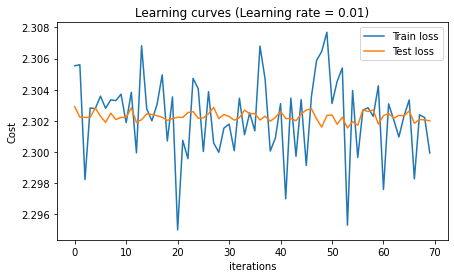

In [32]:
# n_iters = 3000
# num_epochs = n_iters / (len(mnist_data_train) / batch_size)
num_epochs = 15
alpha = 0.5

'''
INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, 500, 250, 100, output_dim)

'''
INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = alpha)

'''
TRAIN THE MODEL
'''
train_costs = []
test_costs = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 200 == 0:
            train_costs.append(loss.item())
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                test_cost = criterion(outputs, labels)
                test_costs.append(test_cost.item())
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Train Loss: {}. Test Accuracy: {}'.format(iter, loss.item(), accuracy))

# plot the cost
plt.plot(train_costs)
plt.plot(test_costs)
plt.ylabel('Cost')
plt.xlabel('iterations')
plt.title("Learning curves (Learning rate = " + str(learning_rate) + ')')
plt.legend(['Train loss', 'Test loss'])
plt.show()

### Alpha is set to 0.1

Iteration: 200. Train Loss: 2.3043601512908936. Test Accuracy: 9.579999923706055
Iteration: 400. Train Loss: 2.3092024326324463. Test Accuracy: 10.100000381469727
Iteration: 600. Train Loss: 2.3069841861724854. Test Accuracy: 11.350000381469727
Iteration: 800. Train Loss: 2.2971572875976562. Test Accuracy: 10.100000381469727
Iteration: 1000. Train Loss: 2.2949821949005127. Test Accuracy: 11.350000381469727
Iteration: 1200. Train Loss: 2.299431324005127. Test Accuracy: 10.319999694824219
Iteration: 1400. Train Loss: 2.3066935539245605. Test Accuracy: 11.350000381469727
Iteration: 1600. Train Loss: 2.305044651031494. Test Accuracy: 10.279999732971191
Iteration: 1800. Train Loss: 2.30511736869812. Test Accuracy: 11.350000381469727
Iteration: 2000. Train Loss: 2.300729274749756. Test Accuracy: 10.100000381469727
Iteration: 2200. Train Loss: 2.3029305934906006. Test Accuracy: 11.350000381469727
Iteration: 2400. Train Loss: 2.2957684993743896. Test Accuracy: 11.350000381469727
Iteration: 260

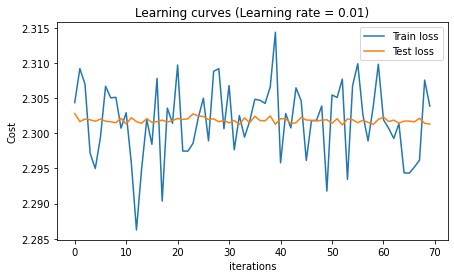

In [33]:
# n_iters = 3000
# num_epochs = n_iters / (len(mnist_data_train) / batch_size)
num_epochs = 15
alpha = 0.1

'''
INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, 500, 250, 100, output_dim)

'''
INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = alpha)

'''
TRAIN THE MODEL
'''
train_costs = []
test_costs = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 200 == 0:
            train_costs.append(loss.item())
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                test_cost = criterion(outputs, labels)
                test_costs.append(test_cost.item())
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Train Loss: {}. Test Accuracy: {}'.format(iter, loss.item(), accuracy))

# plot the cost
plt.plot(train_costs)
plt.plot(test_costs)
plt.ylabel('Cost')
plt.xlabel('iterations')
plt.title("Learning curves (Learning rate = " + str(learning_rate) + ')')
plt.legend(['Train loss', 'Test loss'])
plt.show()

### Alpha is set to 0.005

Iteration: 200. Train Loss: 0.3585548400878906. Test Accuracy: 88.86000061035156
Iteration: 400. Train Loss: 0.4684649109840393. Test Accuracy: 87.45999908447266
Iteration: 600. Train Loss: 0.24979466199874878. Test Accuracy: 87.94999694824219
Iteration: 800. Train Loss: 0.4265691339969635. Test Accuracy: 88.86000061035156
Iteration: 1000. Train Loss: 0.27239036560058594. Test Accuracy: 91.93000030517578
Iteration: 1200. Train Loss: 0.3677613437175751. Test Accuracy: 91.66000366210938
Iteration: 1400. Train Loss: 0.17394666373729706. Test Accuracy: 92.05999755859375
Iteration: 1600. Train Loss: 0.27426087856292725. Test Accuracy: 92.80999755859375
Iteration: 1800. Train Loss: 0.21949347853660583. Test Accuracy: 91.94999694824219
Iteration: 2000. Train Loss: 0.32208752632141113. Test Accuracy: 90.02999877929688
Iteration: 2200. Train Loss: 0.3385555148124695. Test Accuracy: 92.43000030517578
Iteration: 2400. Train Loss: 0.2639952301979065. Test Accuracy: 91.01000213623047
Iteration: 260

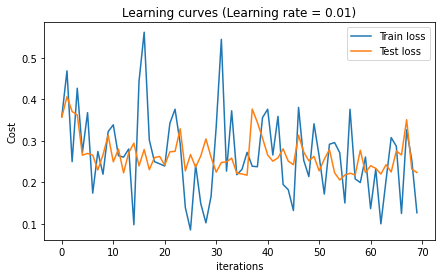

In [34]:
# n_iters = 3000
# num_epochs = n_iters / (len(mnist_data_train) / batch_size)
num_epochs = 15
alpha = 0.005

'''
INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, 500, 250, 100, output_dim)

'''
INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = alpha)

'''
TRAIN THE MODEL
'''
train_costs = []
test_costs = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 200 == 0:
            train_costs.append(loss.item())
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                test_cost = criterion(outputs, labels)
                test_costs.append(test_cost.item())
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Train Loss: {}. Test Accuracy: {}'.format(iter, loss.item(), accuracy))

# plot the cost
plt.plot(train_costs)
plt.plot(test_costs)
plt.ylabel('Cost')
plt.xlabel('iterations')
plt.title("Learning curves (Learning rate = " + str(learning_rate) + ')')
plt.legend(['Train loss', 'Test loss'])
plt.show()

The performance of the network improves when the weight decay approaches zero